<h1> EDA

<h4> Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud

<h4> Loading raw dataset

In [5]:
df = pd.read_csv('../data/(A) data.csv')

<h4> Dataset Overview

In [6]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<h4> Missing data

In [4]:
df['airline_sentiment_confidence'].describe()

count    14640.000000
mean         0.900169
std          0.162830
min          0.335000
25%          0.692300
50%          1.000000
75%          1.000000
max          1.000000
Name: airline_sentiment_confidence, dtype: float64

In [5]:
for column in df.columns:
    print(column, df[column].isna().mean()*100)

tweet_id 0.0
airline_sentiment 0.0
airline_sentiment_confidence 0.0
negativereason 37.30874316939891
negativereason_confidence 28.12841530054645
airline 0.0
airline_sentiment_gold 99.72677595628416
name 0.0
negativereason_gold 99.78142076502732
retweet_count 0.0
text 0.0
tweet_coord 93.0396174863388
tweet_created 0.0
tweet_location 32.3292349726776
user_timezone 32.92349726775956


-> 'tweet_id' should be the index column

-> 'airline_sentiment_gold', 'negative_reason_gold', 'name', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone' seem to be less important

-> column names can be renamed

<h4> Completeness of reasons for all negative sentiments

In [6]:
print(df[df['airline_sentiment'] == 'negative']['negativereason'].isna().sum())
print(df[df['airline_sentiment'] == 'negative']['negativereason_confidence'].isna().sum())

0
0


-> All negative sentiments have their attached negative reasons

<h4> Duplicated row

In [7]:
df['tweet_id'].duplicated().sum()

155

-> Some tweets are presented more than once

<h4> Word Cloud

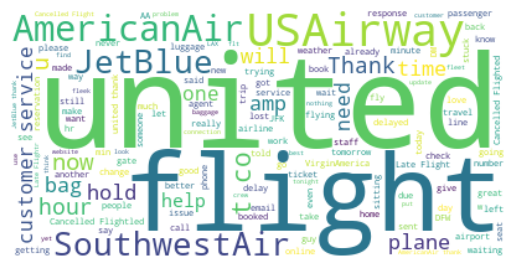

In [8]:
plt.imshow(WordCloud(background_color='white').generate(' '.join(df['text'])), interpolation='bilinear')
plt.axis('off')
plt.show()

<h4> Defined Sentiment Distribution

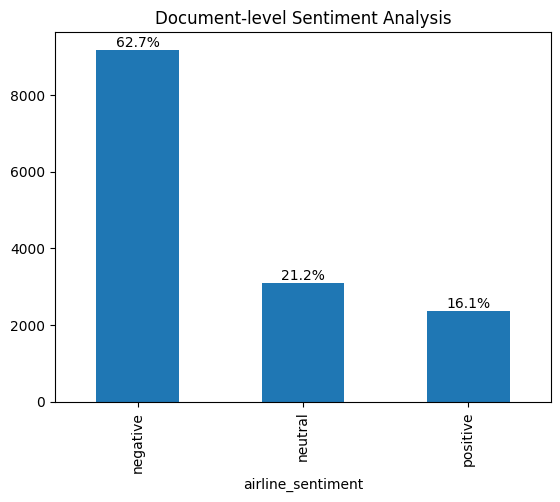

In [9]:
value_counts = df['airline_sentiment'].value_counts()
total = len(df['airline_sentiment'])
ax = value_counts.plot(kind='bar')
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')  
plt.title('Document-level Sentiment Analysis')
plt.show()

-> Document-level sentiment analysis: negative (towards the US Airline Industry)